## Import Library

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

<!-- !pip install factor_analyzer -->

In [ ]:
# !pip install factor_analyzer

## Factor Analysis

In [ ]:
df= pd.read_csv("dataset/bfi.csv")
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)
df.dropna(inplace=True)
df

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,3.0,4.0,3.0,1.0,3.0,5.0,4.0,5.0,3.0,4.0,...,5.0,6.0,5.0,5.0,6.0,6.0,1,4.0,5.0,2.0
2794,5.0,5.0,5.0,5.0,3.0,5.0,4.0,2.0,3.0,5.0,...,4.0,5.0,3.0,5.0,2.0,6.0,1,5.0,6.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,...,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,...,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


In [ ]:
correlation = df.corr()
correlation

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
A1,1.000000,-0.350905,-0.273636,-0.156754,-0.192698,0.014698,0.012918,-0.020587,0.115074,0.038293,...,0.168279,0.139814,0.092366,0.042140,0.015181,0.005782,0.066176,-0.063788,-0.090512,0.099166
A2,-0.350905,1.000000,0.503041,0.350856,0.397400,0.102983,0.129574,0.188818,-0.146295,-0.121106,...,-0.093627,-0.050476,-0.040407,-0.086735,0.019688,0.125633,0.013958,0.165319,0.082609,-0.080838
A3,-0.273636,0.503041,1.000000,0.384918,0.515679,0.114211,0.146511,0.129391,-0.121116,-0.153811,...,-0.083266,-0.092473,-0.039158,-0.127107,-0.040143,0.150086,0.006588,0.226333,0.032267,-0.041750
A4,-0.156754,0.350856,0.384918,1.000000,0.325644,0.094813,0.226454,0.133065,-0.172271,-0.249675,...,-0.106645,-0.155289,-0.073887,-0.171228,-0.015136,0.057075,0.037763,0.070983,-0.049793,0.027308
A5,-0.192698,0.397400,0.515679,0.325644,1.000000,0.134692,0.116863,0.130820,-0.125531,-0.167036,...,-0.204765,-0.198836,-0.138472,-0.215346,-0.081404,0.162596,-0.006988,0.238191,0.011354,-0.050449
C1,0.014698,0.102983,0.114211,0.094813,0.134692,1.000000,0.438223,0.317270,-0.362491,-0.261079,...,-0.071954,-0.038180,-0.025476,-0.098035,-0.047970,0.179249,-0.129263,0.196562,0.100189,-0.130471
C2,0.012918,0.129574,0.146511,0.226454,0.116863,0.438223,1.000000,0.362826,-0.396090,-0.303820,...,-0.019951,-0.005586,0.003189,-0.044341,0.051212,0.161042,-0.057347,0.192681,0.047427,-0.066590
C3,-0.020587,0.188818,0.129391,0.133065,0.130820,0.317270,0.362826,1.000000,-0.357824,-0.350949,...,-0.079093,-0.066880,-0.077416,-0.122175,-0.023508,0.091141,-0.029604,0.058880,0.011360,-0.002809
C4,0.115074,-0.146295,-0.121116,-0.172271,-0.125531,-0.362491,-0.396090,-0.357824,1.000000,0.487551,...,0.215852,0.158346,0.201905,0.270633,0.197062,-0.093561,0.208072,-0.083027,0.053014,0.189543
C5,0.038293,-0.121106,-0.153811,-0.249675,-0.167036,-0.261079,-0.303820,-0.350949,0.487551,1.000000,...,0.216414,0.246298,0.241599,0.354664,0.179009,-0.085630,0.122596,-0.074129,0.135482,0.055804


Pertama, mari kita lakukan terlebih dahulu pengujian "Bartlett Sphericity" dan "KMO". Dua uji ini menguji apakah adanya 'hubungan' antara variabel-variabel prediktor (berupa 32 aspek kepribadian).

### Bartlett Sphericity

In [ ]:
_,p = calculate_bartlett_sphericity(df)
print("Bartlett Sphericity Test")
print("p value : ",p)

Bartlett Sphericity Test
p value :  0.0


jika p value < 0.5 maka GAASSS untuk next step

### Uji KMO (KAISER-MEYER-OLKIN)

KMO adalah uji yang dilakukan untuk menentukan kelayakan (appropriateness) dari suatu analisis faktor yang akan dilakukan. Skala uji KMO berkisar antara 0 sampai 1. Jika nilai KMO hitung lebih rendah dari 0.5, maka analisis faktor tidak layak dilakukan. Sedangkan jika nilai KMO hitung lebih besar dari 0.5, maka analisis faktor layak dilakukan. 

In [ ]:
kmo_all,kmo_model = calculate_kmo(df)
print("KMO Test Statisitc",kmo_model)

KMO Test Statisitc 0.8485397221949238


### get eigenvalues

In [ ]:
fa = FactorAnalyzer()
fa.fit(df)

FactorAnalyzer(rotation_kwargs={})

In [ ]:
ev, v = fa.get_eigenvalues()
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

In [ ]:
w, v = np.linalg.eig(correlation.values)

print("Printing the Eigen values of the given square array:\n", w)

Printing the Eigen values of the given square array:
 [5.13431118 2.75188667 2.14270195 1.85232761 1.54816285 1.07358247
 0.83953893 0.26253902 0.79920618 0.71898919 0.68808879 0.67637336
 0.65179984 0.38185679 0.38780448 0.40067145 0.42336611 0.448921
 0.62325295 0.59656284 0.48263952 0.49450315 0.51451752 0.54330533
 0.56309083]


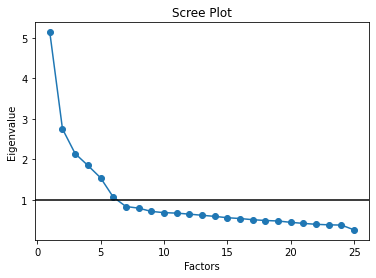

In [ ]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1,c='k')

### Faktor latent

In [ ]:
fa = FactorAnalyzer(n_factors=6)
fa.fit(df)
df_fa = pd.DataFrame(fa.loadings_,index=df.columns)
df_fa.columns =['faktor 1','faktor 2','faktor 3','faktor 4','faktor 5','faktor 6']
df_fa

,faktor 1,faktor 2,faktor 3,faktor 4,faktor 5,faktor 6
A1,0.034147,0.083264,0.106730,-0.629201,0.143566,0.193163
A2,0.109782,0.160402,0.048077,0.665881,-0.035486,-0.037956
A3,0.009941,0.243903,0.014017,0.533463,0.026492,0.165820
A4,-0.048311,0.122608,0.192408,0.344057,0.173041,0.030568
A5,-0.163662,0.305624,-0.018559,0.344281,0.042456,0.275751
C1,0.021187,-0.042991,0.593874,-0.083253,-0.122853,0.040549
C2,0.080908,-0.116466,0.747472,-0.051318,-0.001605,0.053970
C3,0.017228,-0.084298,0.606881,0.048240,0.060647,-0.103667
C4,0.014856,0.008102,-0.675315,-0.136663,0.143328,0.455994
C5,0.154293,-0.091383,-0.556505,-0.014181,-0.054843,0.238312


<AxesSubplot:>

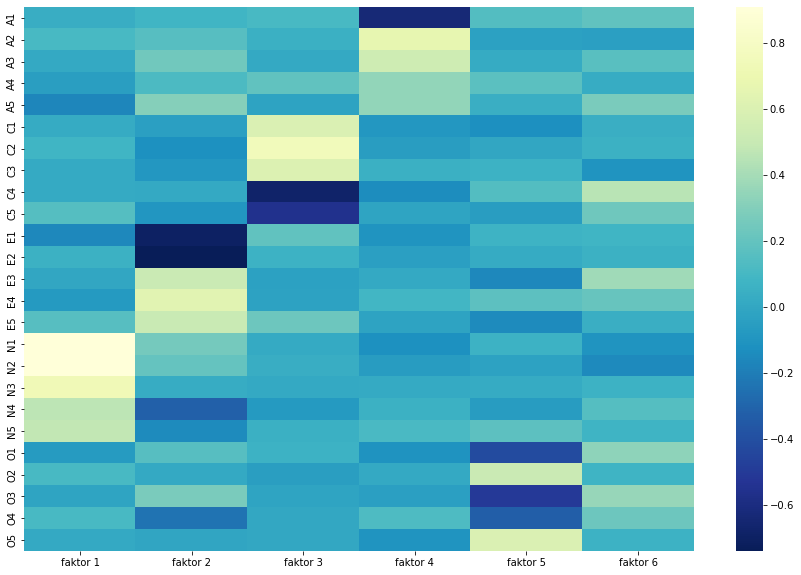

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(df_fa, cmap="YlGnBu_r")

### Explained Variance

In [ ]:
pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'])

,0,1,2,3,4,5
Variance,2.772715,2.569633,2.208900,1.485449,1.366273,0.995674
Proportional Var,0.110909,0.102785,0.088356,0.059418,0.054651,0.039827
Cumulative Var,0.110909,0.213694,0.302050,0.361468,0.416119,0.455946


## PCA

In [ ]:
data = sns.load_dataset('iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# data.describe()

### Data Preprocessing

In [ ]:
feats = ['sepal_length','sepal_width','petal_length','petal_width']
X = data.drop('species', axis=1).values
y = data['species'].values


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [ ]:
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Gunakan PCA untuk mendapatkan Principle Components

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(X_std)
pcs = pca.transform(X_std)

pdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4'])
pdf['species'] = y
pdf.head()

,pc1,pc2,pc3,pc4,species
0,-2.264703,0.480027,-0.127706,-0.024168,setosa
1,-2.080961,-0.674134,-0.234609,-0.103007,setosa
2,-2.364229,-0.341908,0.044201,-0.028377,setosa
3,-2.299384,-0.597395,0.091290,0.065956,setosa
4,-2.389842,0.646835,0.015738,0.035923,setosa


### Skree Plot

In [ ]:
print('Explained variance:', pca.explained_variance_)
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance: [2.93808505 0.9201649  0.14774182 0.02085386]
Explained variance ratio: [0.72962445 0.22850762 0.03668922 0.00517871]


<BarContainer object of 4 artists>

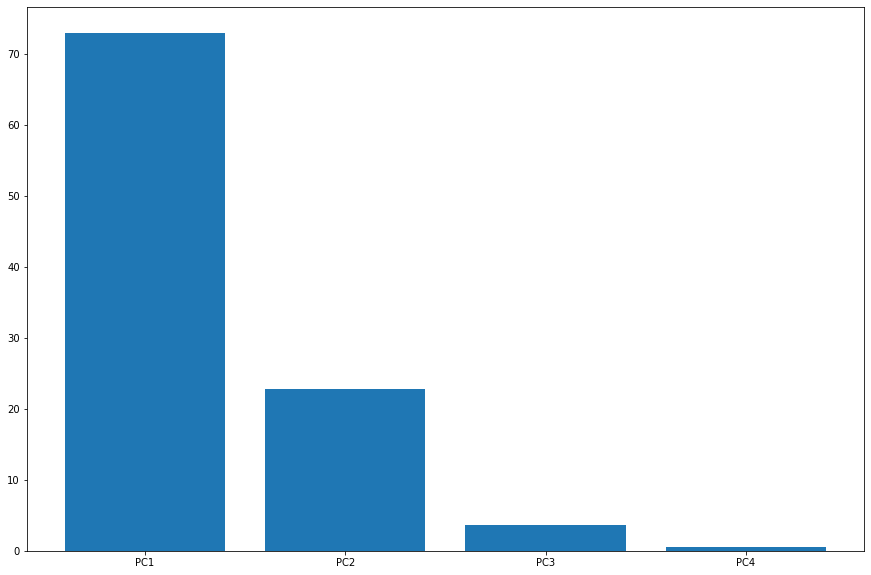

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(['PC1', 'PC2', 'PC3', 'PC4'], pca.explained_variance_ratio_ * 100)

### Reduksi Feature

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_std)
pcs = pca.transform(X_std)

X_std_pca = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2'])
X_std_pca['species'] = y
X_std_pca.head()

,pc1,pc2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


### Sampling Dataset

In [ ]:
X_pca = X_std_pca.drop('species', axis=1)
y_pca = X_std_pca['species']

X_train_pca, X_test_pca,Y_train_pca,Y_test_pca = train_test_split(X_pca,y_pca,
                                                test_size = 0.4,
                                                random_state = 42)

In [ ]:
X_train, X_test,Y_train,Y_test = train_test_split(X_std,y,
                                                test_size = 0.4,
                                                random_state = 42)

### Modelling with PCA

In [ ]:
model_pca = RandomForestClassifier(random_state=42)
model_pca.fit(X_train_pca, Y_train_pca)

RandomForestClassifier(random_state=42)

### Modelling without PCA

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

### Predicting

In [ ]:
y_pred_pca = model_pca.predict(X_test_pca)

In [ ]:
y_pred = model.predict(X_test)

### Evaluation with PCA

In [ ]:
accuracy_score(Y_test_pca, y_pred_pca)

0.9333333333333333

### Evaluation without PCA

In [ ]:
accuracy_score(Y_test, y_pred)

0.9833333333333333

**di contoh ini kebetulan kalo pake PCA accuracy nya justru turun, karena jumlah fitur awalnya masih sedikit.
tapi ketika jumlah fiturnya cukup banyak, dan ada noise, biasanya pake PCA akan membantu meningkatkan akurasi.
setidaknya kita sudah belajar bagaimana cara mengaplikasikan PCA dalam modelling**